# Comparative Analysis: Insertion Sort vs. Bucket Sort

**Student:** Samuele Dell'Erba  
**Student ID:** 7137648

## 1. Introduction
This notebook presents an experimental comparison of two sorting algorithms: **Insertion Sort** and **Bucket Sort**. The analysis aims to verify their theoretical complexities by testing them on different input data distributions, in order to highlight their practical advantages and disadvantages.

### Theoretical Description of the Algorithms

#### Insertion Sort
Insertion Sort is a simple comparison-based sorting algorithm that builds the final sorted array one item at a time. It iterates through the input elements and inserts each one into its correct position in the sorted part of the array.
- **Time Complexity:**
	- **Worst and Average Case: O(n²)**
	- **Best Case (already sorted data): O(n)**
- **Space Complexity: O(1)** (in-place)

#### Bucket Sort
Bucket Sort is a non-comparison-based algorithm that operates by distributing elements into a number of buckets. Each bucket is then sorted individually, either using a different sorting algorithm or by recursively applying bucket sort. For this analysis, Insertion Sort is used to sort the individual buckets. **Following the standard implementation from the CLRS textbook, the number of buckets used is equal to *n*, the number of elements in the input array.**
- **Time Complexity:**
	- **Average Case: O(n+k)** (where k is the number of buckets), which is effectively linear, provided the elements are **uniformly distributed**. Since we use k=n, this becomes **O(n)**.
	- **Worst Case: O(n²)**, which occurs if all elements are placed into the same bucket.
- **Space Complexity: O(n+k)**, which becomes **O(n)** in our implementation.

In [ ]:
%pip install numpy
%pip install matplotlib

import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt

def insertion_sort(arr):
	for i in range(1, len(arr)):
		key = arr[i]
		j = i - 1
		while j >= 0 and key < arr[j]:
			arr[j + 1] = arr[j]
			j -= 1
		arr[j + 1] = key
	return arr

def bucket_sort(arr):
    n = len(arr)
    if n == 0:
        return []
    buckets = [[] for _ in range(n)]
    for i in range(n):
        value = arr[i]
        bucket_index = math.floor(n * value)
        if bucket_index == n:
            bucket_index = n - 1
        buckets[bucket_index].append(value)
    for i in range(n):
        insertion_sort(buckets[i])
    sorted_arr = []
    for bucket in buckets:
        sorted_arr.extend(bucket)
    return sorted_arr
	

print("Algorithms ready to use.")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Algorithms ready to use.


## 2. Experimental Design
To effectively compare the two algorithms, a series of tests were designed to measure execution times across various array sizes. Crucially, three different data distributions are used to investigate the specific strengths and weaknesses of each algorithm.

- **Scenario 1: Uniformly Distributed Data**
  - Data are generated randomly within the interval `[0, 1)`. This represents the ideal case for Bucket Sort.
  - **Hypothesis:** `bucket_sort` is expected to be significantly faster than `insertion_sort`, exhibiting near-linear complexity.

- **Scenario 2: Clustered Data Distribution**
  - Data are generated from a normal distribution with a very low standard deviation. This creates the worst-case scenario for Bucket Sort, as most elements will fall into a small number of buckets.
  - **Hypothesis:** The performance of `bucket_sort` is expected to degrade substantially, approaching the O(n²) complexity of `insertion_sort`.

- **Scenario 3: Already Sorted Data**
  - Data are generated as a perfectly sorted sequence in `[0, 1)`. This represents the best case for Insertion Sort.
  - **Hypothesis:** Insertion Sort's performance should improve to linear time (O(n)), making it highly competitive and providing an interesting comparison in this "easy" case.

A benchmark function is now defined to automate these tests.

**Note on Plotting:** All results will be plotted with a logarithmic scale on the Y-axis. This is a crucial choice for visualization. Without it, the fast-growing execution times of the O(n²) cases would make the much smaller times of the linear or near-linear cases appear as a flat line near zero, making it impossible to see and compare their trends. The logarithmic scale allows for a clear visualization of performance differences across several orders of magnitude.

In [ ]:
def run_benchmark(algorithms, data_generator, sizes, trials=3):
	results = {name: [] for name in algorithms}

	for size in sizes:
		total_times = {name: 0.0 for name in algorithms}
		print(f"Testing size: {size}...")

		for _ in range(trials):
			data = data_generator(size)

			for name, func in algorithms.items():
				data_copy = list(data)

				start_time = time.perf_counter()
				func(data_copy)
				end_time = time.perf_counter()
				total_times[name] += (end_time - start_time)

		for name in algorithms:
			avg_time = total_times[name] / trials
			results[name].append(avg_time)

	return results

def plot_results(results, title, sizes):
	plt.figure(figsize=(10, 6))
	for name, times in results.items():
		plt.plot(sizes, times, marker='o', linestyle='-', label=name)

	plt.xlabel("Array Size (N)")
	plt.ylabel("Average Execution Time (seconds)")
	plt.title(title)
	plt.legend()
	plt.grid(True)
	plt.yscale('log')
	plt.show()

algorithms_to_test = {
	"Insertion Sort": insertion_sort,
	"Bucket Sort": bucket_sort
}

test_sizes = [500, 1000, 2000, 4000, 6000, 8000]

print("Benchmark framework ready.")

Benchmark framework ready.


### Scenario 1 Execution: Uniformly Distributed Data

The first benchmark is run using data generated from a uniform distribution.

--- BENCHMARK EXECUTION ON UNIFORM DATA ---
Testing size: 500...
Testing size: 1000...
Testing size: 2000...
Testing size: 4000...
Testing size: 6000...
Testing size: 8000...


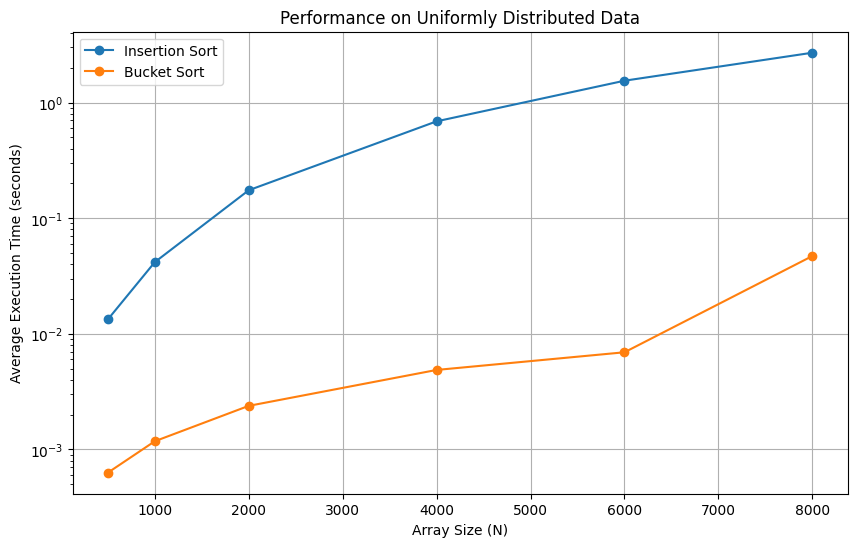

In [ ]:
def uniform_data_generator(size):
    return [random.random() for _ in range(size)]

print("--- BENCHMARK EXECUTION ON UNIFORM DATA ---")

uniform_results = run_benchmark(algorithms_to_test, uniform_data_generator, test_sizes)

plot_results(uniform_results, "Performance on Uniformly Distributed Data", test_sizes)

#### Results Analysis – Uniform Data

The results from this first test align well with the initial hypothesis. The graph shows **Insertion Sort**'s runtime increasing rapidly, consistent with its O(n²) average-case behavior. In contrast, **Bucket Sort** is orders of magnitude faster; its execution time grows much more slowly, which supports its theoretical near-linear performance on uniformly distributed data. In this ideal scenario, Bucket Sort is clearly the more efficient algorithm.

---

### Scenario 2 Execution: Clustered Data

Next, the worst-case scenario for Bucket Sort is tested using heavily clustered data.

--- BENCHMARK EXECUTION ON CLUSTERED DATA ---
Testing size: 500...
Testing size: 1000...
Testing size: 2000...
Testing size: 4000...
Testing size: 6000...
Testing size: 8000...


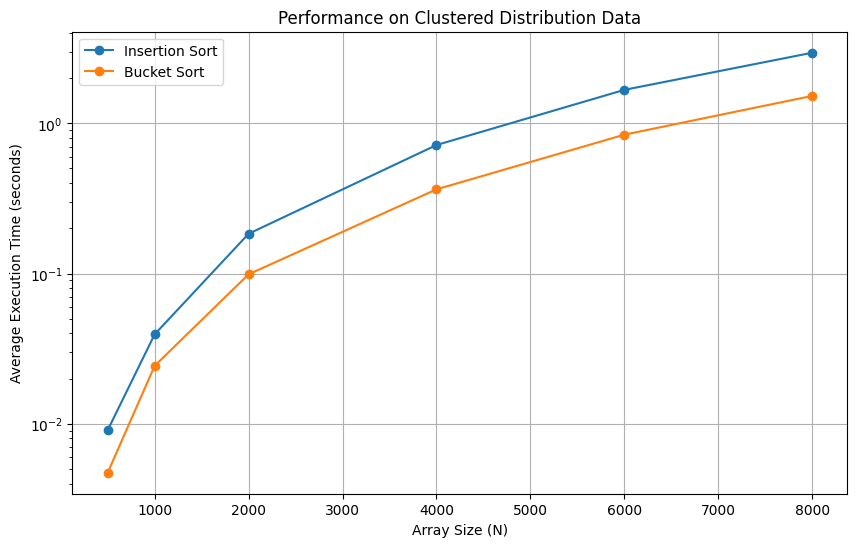

In [ ]:
def clustered_data_generator(size):
    mean = 0.5
    std_dev = 0.00001
    data = np.random.normal(mean, std_dev, size)
    data_clipped = np.clip(data, 0, 1)
    return list(data_clipped)

print("--- BENCHMARK EXECUTION ON CLUSTERED DATA ---")

clustered_results = run_benchmark(algorithms_to_test, clustered_data_generator, test_sizes)

plot_results(clustered_results, "Performance on Clustered Distribution Data", test_sizes)

#### Results Analysis – Clustered Data

This second graph illustrates a dramatically different outcome. The performance of **Bucket Sort** has degraded significantly, and its curve now shows a steep growth similar to that of Insertion Sort. This is the expected result, as the clustered data forces most elements into the same few buckets. Consequently, the task of sorting these large buckets with Insertion Sort becomes the main computational bottleneck, pushing the overall complexity towards O(n²). This experiment effectively highlights Bucket Sort's primary weakness: its reliance on a uniform data distribution.

---

### Scenario 3 Execution: Already Sorted Data

The final experiment explores the best-case scenario for Insertion Sort, using input data that is already sorted.

--- BENCHMARK EXECUTION ON SORTED DATA ---
Testing size: 500...
Testing size: 1000...
Testing size: 2000...
Testing size: 4000...
Testing size: 6000...
Testing size: 8000...


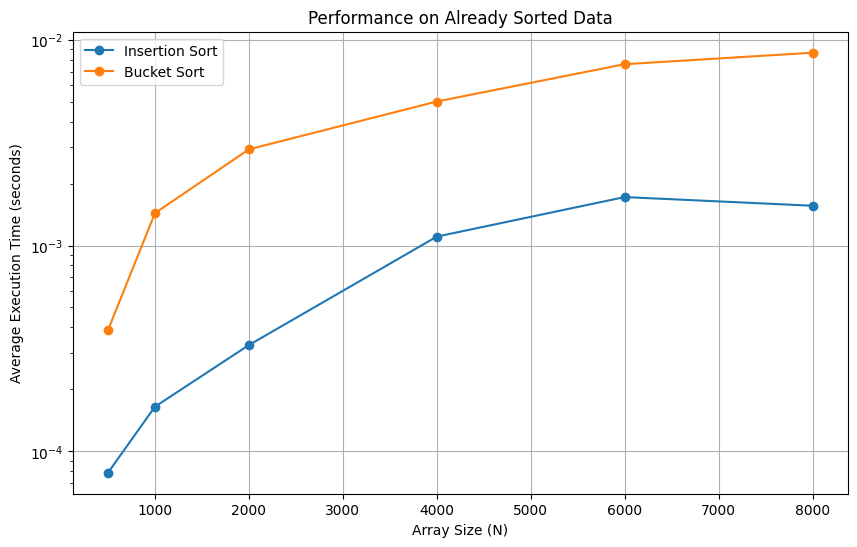

In [ ]:
def sorted_data_generator(size):
    if size == 0:
        return []
    return [i / size for i in range(size)]

print("--- BENCHMARK EXECUTION ON SORTED DATA ---")

sorted_results = run_benchmark(algorithms_to_test, sorted_data_generator, test_sizes)

plot_results(sorted_results, "Performance on Already Sorted Data", test_sizes)

#### Results Analysis – Sorted Data

The results for this scenario are quite revealing.
- **Insertion Sort** is now extremely fast, and its performance trend is clearly linear. This is consistent with its O(n) best-case complexity. It is no longer significantly slower than Bucket Sort.
- **Bucket Sort** also remains very fast, maintaining its near-linear performance since the sorted data is also perfectly uniform.

This test highlights a key strength of Insertion Sort: it is an **adaptive** sorting algorithm. Its performance improves dramatically when the input is already partially sorted. For fully sorted lists, its low overhead can make it one of the fastest algorithms available in practice.

---

## 3. Conclusions

The experimental analysis has confirmed the theoretical characteristics of the two algorithms across different data distributions:

1.  **Insertion Sort** is a simple and robust algorithm. While its general performance is quadratic (O(n²)), it possesses a significant advantage in being **adaptive**. The test on sorted data demonstrated that its performance improves to linear time (O(n)) on nearly sorted inputs, which makes it an excellent choice for small datasets or for lists that are already nearly sorted.

2.  **Bucket Sort** is a highly efficient algorithm (nearly O(n)), but its performance is critically dependent on the input data being **uniformly distributed**. When this condition is met, it is one of the fastest sorting algorithms available. However, as the test with clustered data showed, its performance degrades to quadratic time when this assumption is violated.

In summary, the choice between these two algorithms should be based on prior knowledge of the data's properties. If the data is known to be uniform, Bucket Sort is the superior choice for large datasets. If the data is expected to be small or nearly sorted, Insertion Sort's simplicity and adaptive nature make it a strong contender. Without any specific information about the data distribution, choosing between them involves a trade-off between the potential high speed of Bucket Sort and the more consistent, though slower, performance of Insertion Sort.